In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mlt
%matplotlib inline
mlt.style.use('ggplot')

# Introduction

This dataset consists of the number of suicides of almost 100 countries from 1987 to 2016.

# Let's take a look at the data

In [2]:
suicide=pd.read_csv('suicide.csv')
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Missing data handling

In [3]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Except one column all the others have no null values. 

# Pre Analysis stuff

In [4]:
# Since HDI is the only one with missing values and of no use to us we will drop it
suicide.drop('HDI for year',axis=1,inplace=True)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [5]:
# What countries are involved
suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
# What generations are involved and of what age limits
suicide.groupby(['generation','age'])['age'].agg('count')

generation       age        
Boomers          25-34 years    1154
                 35-54 years    3030
                 55-74 years     806
G.I. Generation  55-74 years     630
                 75+ years      2114
Generation X     15-24 years    2114
                 25-34 years    2682
                 35-54 years     982
                 5-14 years      630
Generation Z     5-14 years     1470
Millenials       15-24 years    2528
                 25-34 years     806
                 5-14 years     2510
Silent           35-54 years     630
                 55-74 years    3206
                 75+ years      2528
Name: age, dtype: int64

# Analysis

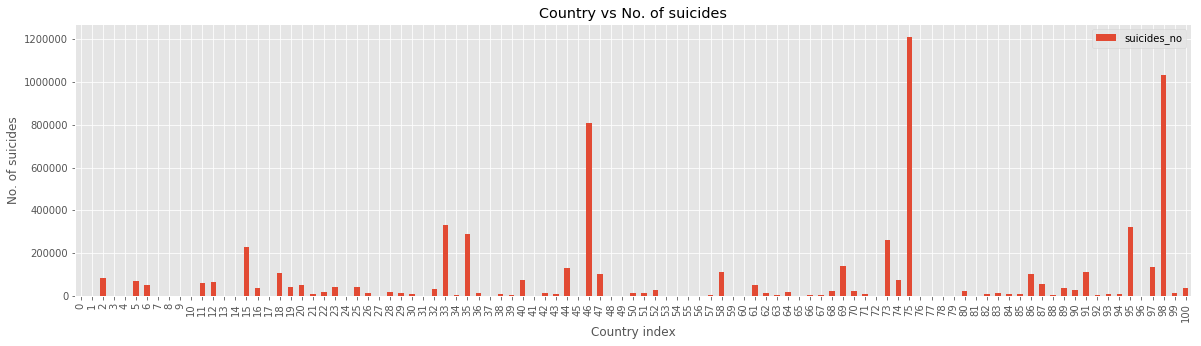

In [7]:
#1 Country with most no. of suicides
suicide.groupby('country',as_index=False)['suicides_no'].agg('sum').plot(kind='bar',figsize=(20,5))
plt.title('Country vs No. of suicides')
plt.xlabel('Country index')
plt.ylabel('No. of suicides')
plt.show()

Russian Federation holds the lead of the number of suicides with United States at the second position. Japan comes in the third position. It appears that the world leaders are the one who have too many suicides.

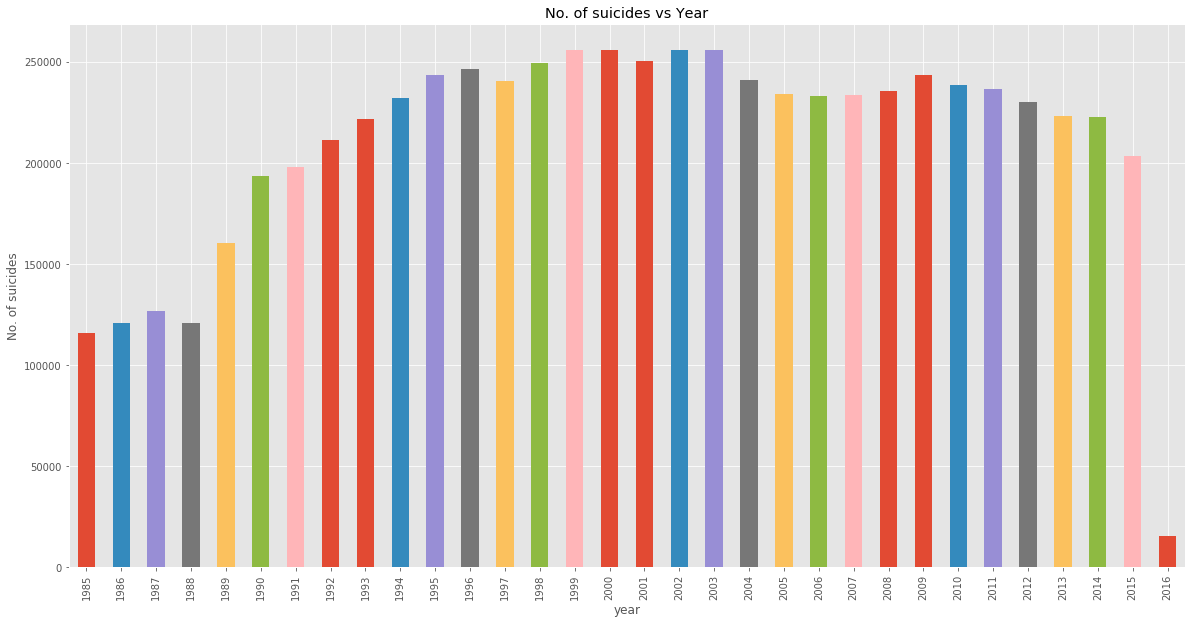

In [8]:
#2 Year with most no. of suicides
suicide.groupby('year')['suicides_no'].agg('sum').plot(kind='bar',figsize=(20,10))
plt.title('No. of suicides vs Year')
plt.ylabel('No. of suicides')
plt.show()

It seems that 1999,2000,2002and 2003 are the years when people committed suicide the most. 1998 and  2001 are the years which just touched the 250,000 mark.The number of suicides increased from 1988 to 2003 and decreased after that.1989 and 1990 are the years when the suicides increased quite ridiculously.

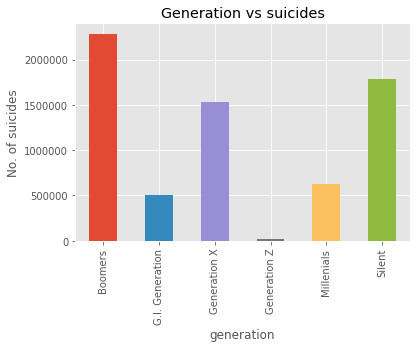

In [9]:
#3 Which generation commit most no. of suicides
suicide.groupby('generation')['suicides_no'].agg('sum').plot(kind='bar')
plt.title('Generation vs suicides')
plt.ylabel('No. of suicides')
plt.show()

As seen from the graph Boomers is the generation which has exceeded 2,000,000 mark with silent in the 2nd position. 

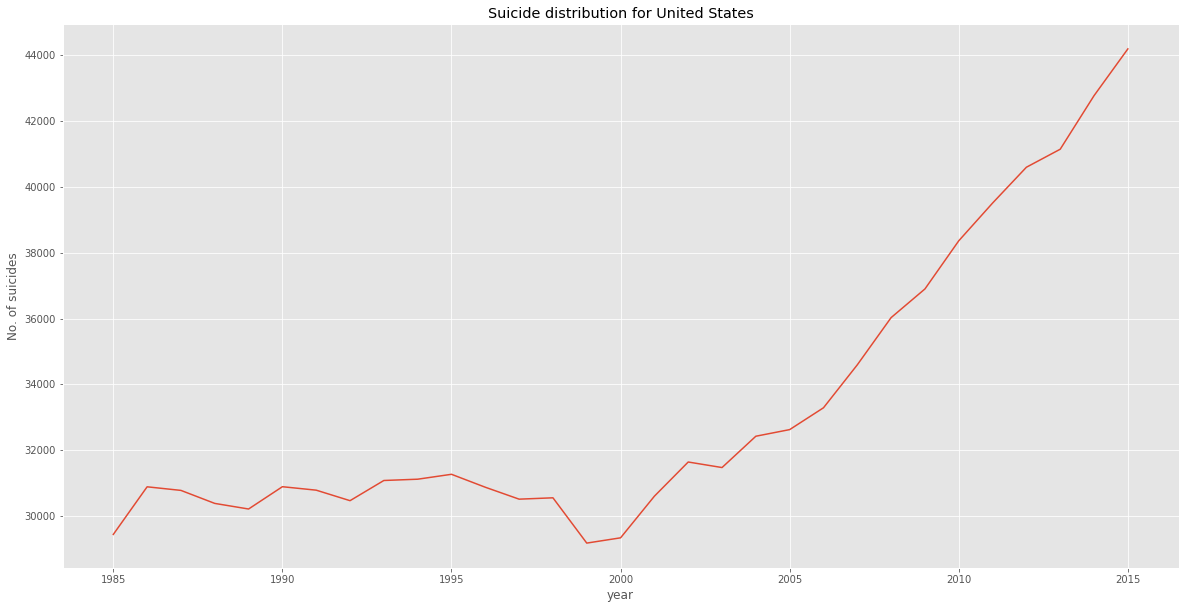

In [10]:
#4 Area graph of suicides per year of united states
suicide[suicide['country']=='United States'].groupby('year')['suicides_no'].agg('sum').plot(kind='line',figsize=(20,10))
plt.title('Suicide distribution for United States')
plt.ylabel('No. of suicides')
plt.show()

It is quite interesting to note that no. of suicides dramatically increased as the century incremented.

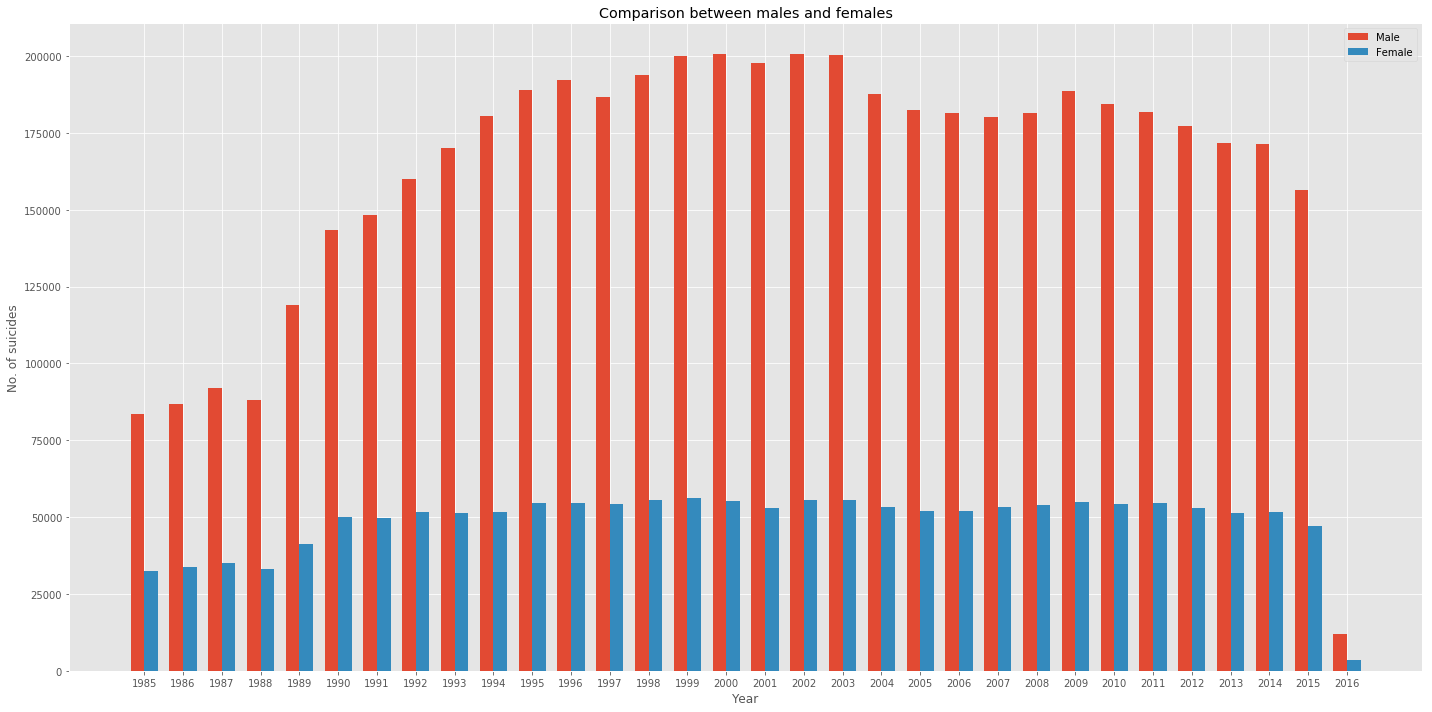

In [11]:
#5 Bar graph of male-female vs no. of suicides in years
fe_male=suicide.groupby(['year','sex'],as_index=False)['suicides_no'].agg('sum').set_index('year')
males=fe_male[fe_male['sex']=='male']
females=fe_male[fe_male['sex']=='female']
barwidth=0.35
fig,ax=plt.subplots(figsize=(20,10))
p1=plt.bar(males.index,males.suicides_no,barwidth,label='Male')
p2=plt.bar(males.index+barwidth,females.suicides_no,barwidth,label='Female')
plt.xlabel('Year')
plt.ylabel('No. of suicides')
plt.title('Comparison between males and females')
plt.xticks(males.index+barwidth/2,males.index)
plt.legend()
plt.tight_layout()

plt.show()

As expected females commit less suicides. As depicted earlier, suicides increased dramatically from 1989 and is slowly decreasing in the 21st century. The rates slightly increased in 2009 but is now under control. It will be quite interesting to note what is the reason that suicides increased so much at the end of the 20th century. 

In [12]:
suicide['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [13]:
#6 Heatmap: x year y age distribution values no. of suicides
ages=suicide.groupby(['year','age'],as_index=False)['suicides_no'].agg('sum')
pivot=ages.pivot_table(index='year',columns='age',values='suicides_no')

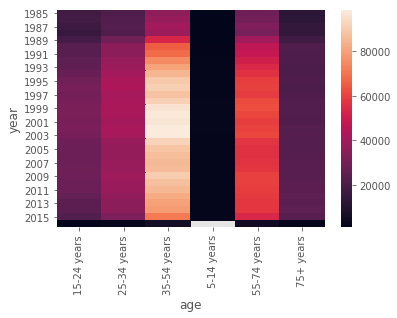

In [14]:
sns.heatmap(pivot)

In every age category, no. of suicides increased as days passed by(also depicted earlier). It is seen that people of age category 35-54 years commit most suicides as due to different kinds of problem. On the other hand, as expected, 5-14 years have least no. of suicides which is rational as children have nothing to commit suicide for. But one surprise entry: In 2015, 5-14 year children suicide rate is just unmeaningful. It might be that in the previous years there were no entries made of 5-14 year children before 2015, otherwise it would be impossible to have such a high rate suddenly.

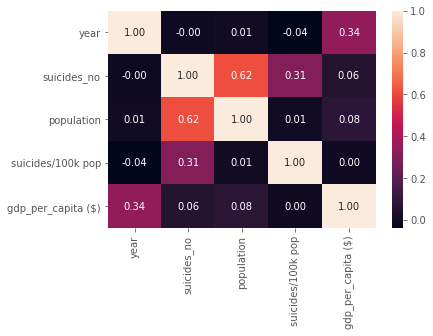

In [15]:
sns.heatmap(suicide.corr(),fmt='.2f',annot=True)

First observation to note is that the gdb_per_capita depends most on year, which means that as years pass by the gdb increases. The number of suicides depends on population which is quite rational to explain. Obviously, as the population increases, the number if suicides is also going to increase. The relation between gdb and population is not so sigificant but gdb depends on population which is, again, rational to explain.   

# Conclusion

People commit suicide because of many problems like unemployment. That is the reason people with age limit 35-54 years commit the maximum of suicides. It was seen that the end of 20th century has seen a huge rise in the rate of suicides. Russian Federation is the country which holds the lead with United States in the 2nd position. US has seen a huge rise in the rate of suicides after the 21st century began and is still linearly increasing. If these curves go on like this, it is not very long that the world will have a huge civil war against themselves.  

# Thank You